In [2]:

#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Statistics imports
from scipy import stats
import statsmodels.api as sm

import csv
import import_ipynb
import pandas as pd

In [79]:
url = "https://archive.ics.uci.edu/static/public/891/data.csv"
df = pd.read_csv(url)

### Feature Engineer Labels for General Health

In [7]:
#definitions variable will be used in RFC table below to view cm matrix results
#1 Excellent
#2 Very good
#3 Good
#4 Fair
#5 Poor
#7 Don’t know/Not Sure 9 Refused
 
definitions = pd.Series([0, "Excellent", "Very good", "Good", "Fair","Poor","UNKNOWN"], dtype="category")

In [9]:

reversefactor = dict(zip(range(7),definitions))
reversefactor

{0: 0,
 1: 'Excellent',
 2: 'Very good',
 3: 'Good',
 4: 'Fair',
 5: 'Poor',
 6: 'UNKNOWN'}

In [14]:
new_df = np.vectorize(reversefactor.get)(df[['GenHlth']])
#y_pred_v = np.vectorize(reversefactor.get)(y_pred)

In [22]:
print(new_df[:5])


[['Poor']
 ['Good']
 ['Poor']
 ['Very good']
 ['Very good']]


In [72]:
#Add new def to df
print(type(new_df))


<class 'numpy.ndarray'>


In [73]:
# Convert to DataFrame
df_GenH_label = pd.DataFrame(new_df, columns=['GenHealth']).reindex()

In [74]:
df_GenH_label.head(2)

,GenHealth
0,Poor
1,Good


In [75]:
df.head(2)

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1


In [80]:
#Merge 2 dataframes
# Merge DataFrames based on the 'key' column
df_concat = pd.concat([df,df_GenH_label], axis=1)

In [86]:
df_concat[['GenHealth','GenHlth','Diabetes_binary','HighBP','HighChol']].head()

,GenHealth,GenHlth,Diabetes_binary,HighBP,HighChol
0,Poor,5,0,1,1
1,Good,3,0,0,0
2,Poor,5,0,1,1
3,Very good,2,0,1,0
4,Very good,2,0,1,1


Question: How many people with good health have diabetis compared to others
?

In [180]:
#1 filter only People with Diabetis 1 - True
#2 filter only people w/o Diabetis  0 = False No diabetis
#3 Create Bar Chart
has_Diabetis = df_concat['Diabetes_binary'] == 1

In [181]:
has_Diabetis_df = df_concat[has_Diabetis]

In [182]:
has_Diabetis_df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,GenHealth
8,8,1,1,1,1,30,1,0,1,0,...,0,5,30,30,1,0,9,5,1,Poor
10,10,1,0,0,1,25,1,0,0,1,...,0,3,0,0,0,1,13,6,8,Good
13,13,1,1,1,1,28,0,0,0,0,...,0,4,0,0,1,0,11,4,6,Fair
17,17,1,0,0,1,23,1,0,0,1,...,0,2,0,0,0,1,7,5,6,Very good
23,23,1,1,0,1,27,0,0,0,1,...,0,1,0,0,0,0,13,5,4,Excellent


In [183]:
GenHe_has_Diabetis_df = has_Diabetis_df.groupby('GenHealth', as_index=False).agg('count')
GenHe_has_Diabetis_df.head()

,GenHealth,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Excellent,1140,1140,1140,1140,1140,1140,1140,1140,1140,...,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
1,Fair,9790,9790,9790,9790,9790,9790,9790,9790,9790,...,9790,9790,9790,9790,9790,9790,9790,9790,9790,9790
2,Good,13457,13457,13457,13457,13457,13457,13457,13457,13457,...,13457,13457,13457,13457,13457,13457,13457,13457,13457,13457
3,Poor,4578,4578,4578,4578,4578,4578,4578,4578,4578,...,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578
4,Very good,6381,6381,6381,6381,6381,6381,6381,6381,6381,...,6381,6381,6381,6381,6381,6381,6381,6381,6381,6381


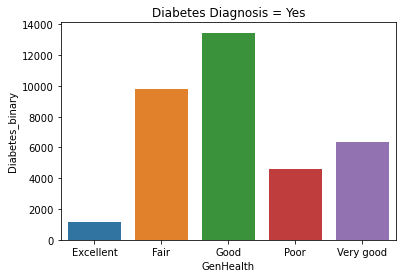

In [184]:
sns.barplot(y='Diabetes_binary', x='GenHealth',data=GenHe_has_Diabetis_df)
 
# Add a title
plt.title("Diabetes Diagnosis = Yes")

plt.show()

In [185]:
df_concat_grp.columns

Index(['GenHealth', 'GenHlth', 'ID', 'Diabetes_binary', 'HighBP', 'HighChol',
       'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [171]:
#1 filter only People with Diabetis 1 - True
#2 filter only people w/o Diabetis  0 = False No diabetis
#3 Create Bar Chart
hasNo_Diabetis = df_concat['Diabetes_binary'] == 0

In [172]:
hasNo_Diabetis_df = df_concat[hasNo_Diabetis]

In [173]:
hasNo_Diabetis_df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,GenHealth
0,0,0,1,1,1,40,1,0,0,0,...,0,5,18,15,1,0,9,4,3,Poor
1,1,0,0,0,0,25,1,0,0,1,...,1,3,0,0,0,0,7,6,1,Good
2,2,0,1,1,1,28,0,0,0,0,...,1,5,30,30,1,0,9,4,8,Poor
3,3,0,1,0,1,27,0,0,0,1,...,0,2,0,0,0,0,11,3,6,Very good
4,4,0,1,1,1,24,0,0,0,1,...,0,2,3,0,0,0,11,5,4,Very good


In [178]:
GenHe_hasNo_Diabetis_df = hasNo_Diabetis_df.groupby('GenHealth', as_index=False).agg('count')
GenHe_hasNo_Diabetis_df.head()

,GenHealth,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Excellent,44159,44159,44159,44159,44159,44159,44159,44159,44159,...,44159,44159,44159,44159,44159,44159,44159,44159,44159,44159
1,Fair,21780,21780,21780,21780,21780,21780,21780,21780,21780,...,21780,21780,21780,21780,21780,21780,21780,21780,21780,21780
2,Good,62189,62189,62189,62189,62189,62189,62189,62189,62189,...,62189,62189,62189,62189,62189,62189,62189,62189,62189,62189
3,Poor,7503,7503,7503,7503,7503,7503,7503,7503,7503,...,7503,7503,7503,7503,7503,7503,7503,7503,7503,7503
4,Very good,82703,82703,82703,82703,82703,82703,82703,82703,82703,...,82703,82703,82703,82703,82703,82703,82703,82703,82703,82703


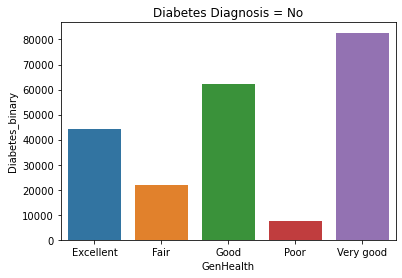

In [179]:
sns.barplot(y='Diabetes_binary', x='GenHealth',data=GenHe_hasNo_Diabetis_df)
 
# Add a title
plt.title("Diabetes Diagnosis = No")

plt.show()

In [ ]:
#Export files for graphing
#GenHe_hasNo_Diabetis_df

#GenHe_has_Diabetis_df